# Deeplens implementation
## 1. Import

In [1]:
import numpy as np
import pandas as pd

import deeplenstronomy.deeplenstronomy as dl
from deeplenstronomy.visualize import view_image
from helpers import*
from deeplenshelpers import*

%matplotlib inline
import matplotlib.pyplot as plt
from matplotlib import colors

## 2. Dataset
The dataset is build with a '.yalm' file where all configurations are define. The models' parameters vary with an uniform distribution.

Lens' light parameters:
* Model : Sersic ellipse
* Amplitude : $amp = 22$
* Sersic radius : $R_{sersic} = 0.25$
* Sersic index : $n_{sersic}= 2.9$
* Ellipsity* : $e_1 = 0$   and $e_2 = 0.09$
* Center : $x = 0$ and $y = 0$

Lens' mass variation :
- Model : Power-law Elliptical Mass Distribution

>$\kappa = \frac{3-\gamma }{2}\left ( \frac{\theta_E}{\sqrt{q e_1^2+ e_2^2/q}} \right )^{\gamma-1}$
 
* Einstein radius: $\theta_E \in [1, 2]$

* Power law slope: $\gamma \in [1.8, 2.2]$
* Ellipsity* : $e_1 \in [-0.18, 0.18]$   and $e_2 \in [0, 0.18]$
* Center : $x = 0$ and $y = 0$

Source variation :
* Model : Sersic ellipse
* Amplitude : $amp \in [10, 24]$
* Sersic radius : $R_{sersic} \in [0.1, 0.4]$
* Sersic index : $n_{sersic} \in [0.8, 5]$
* Ellipsity* : $e_1 \in [-0.18, 0.18]$   and $e_2 \in [0, 0.18]$
* Center : $x \in [-0.5,0.5]$ and $y \in [-0.5,0.5]$

Note* : The ellipsity range is determined with the following equations, where $q\in [0.7, 1]$ and $\phi \in[0, \pi/2]$

>$e_1 = \frac{1-q}{1+q}\cos{(2\phi)}$     and     $e_2 = \frac{1-q}{1+q}\sin{(2\phi)} $

In [2]:
config_file_name1 = 'data/configFile/config_model1.yaml' # Mass variation
dataset1 = dl.make_dataset(config_file_name1)

config_file_name2 = 'data/configFile/config_model2.yaml' # Source variation
dataset2 = dl.make_dataset(config_file_name2)

config_file_name3 = 'data/configFile/config_model3.yaml' # Mass & source variation
dataset3 = dl.make_dataset(config_file_name3)

In [3]:
dataset3.CONFIGURATION_1_metadata.drop(col_drop,axis=1).head()

,PLANE_1-OBJECT_1-MASS_PROFILE_1-theta_E-WFC3_F160W,PLANE_1-OBJECT_1-MASS_PROFILE_1-gamma-WFC3_F160W,PLANE_1-OBJECT_1-MASS_PROFILE_1-e1-WFC3_F160W,PLANE_1-OBJECT_1-MASS_PROFILE_1-e2-WFC3_F160W,PLANE_2-OBJECT_1-LIGHT_PROFILE_1-R_sersic-WFC3_F160W,PLANE_2-OBJECT_1-LIGHT_PROFILE_1-n_sersic-WFC3_F160W,PLANE_2-OBJECT_1-LIGHT_PROFILE_1-e1-WFC3_F160W,PLANE_2-OBJECT_1-LIGHT_PROFILE_1-e2-WFC3_F160W
0,1.793340,2.128782,-0.005388,0.047092,0.327919,2.367274,0.097250,0.049086
1,1.801915,2.091930,-0.030958,0.096895,0.341537,1.915188,0.109212,0.123424
2,1.844282,1.934233,-0.146472,0.144051,0.159149,3.466659,-0.075174,0.171247
3,1.588570,1.880350,0.055945,0.064868,0.293372,3.731223,0.109982,0.175748
4,1.028422,1.944551,0.036629,0.054778,0.257579,1.290662,0.058587,0.056211


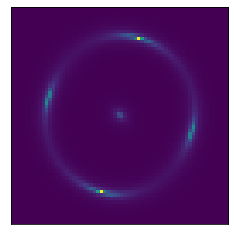

In [4]:
view_image(dataset1.CONFIGURATION_1_images[5][0]) # image without noise

In [5]:
# Build the four classes 
config_repo_model = 'data/configFile/config_model'


for i in np.arange(1,4):
    model_name = config_repo_model + str(i) + '.yaml'
    res = ResidualDeepLens(model_name)
    res.build(i)
print('Data Generation Finished')

Data Generation Finished


In [6]:
metadata = pd.DataFrame()
for i in np.arange(1,4):
    [img, meta] = read_hdf5(i, path = "data/dataSet/")
    metadata = pd.concat([metadata,meta], ignore_index=True)
    if i == 1:
        final_array = img
    else:
         final_array = np.concatenate((final_array, img))
metadata ['ID'] = np.arange(0,final_array.shape[0])

print('Reading Data Finished')

Reading Data Finished


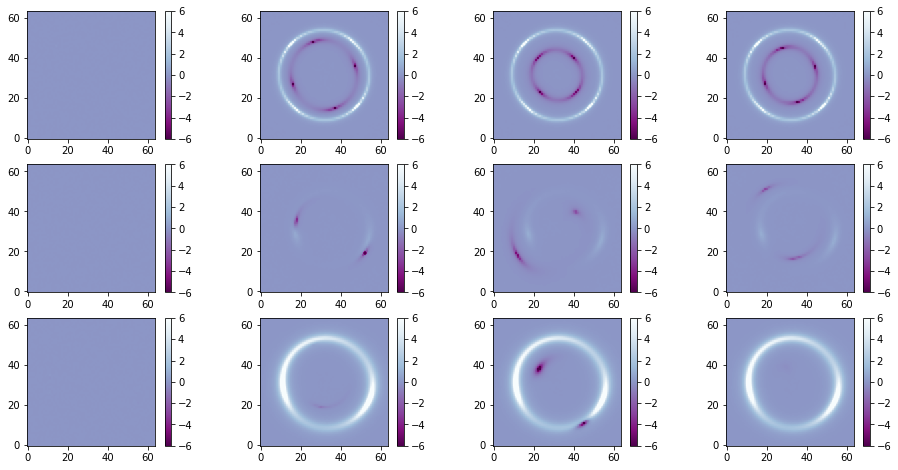

In [7]:
f, axes = plt.subplots(3, 4, figsize=(16, 8), sharex=False, sharey=False)
norm = colors.Normalize(vmin=-6, vmax=6)

for i in range(0,4):
    pos1 = axes[0,i].imshow(final_array[i,0,:,:], vmin=-6, vmax=6, origin='lower',cmap=plt.cm.BuPu_r)
    pos2 = axes[1,i].imshow(final_array[40+i,0,:,:], vmin=-6, vmax=6, origin='lower',cmap=plt.cm.BuPu_r)
    pos3 = axes[2,i].imshow(final_array[80+i,0,:,:], vmin=-6, vmax=6, origin='lower',cmap=plt.cm.BuPu_r)
    f.colorbar(pos1, ax=axes[0,i])
    f.colorbar(pos2, ax=axes[1,i])
    f.colorbar(pos3, ax=axes[2,i])

plt.show()